In [1]:
# Imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from IPython.core.display import display
from statsmodels.stats.diagnostic import het_white

import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt

from scipy import stats

# Lone Wolf Analysis

## Dataframe loading

The following code loads the dataframe with community and smells information.

In [2]:
df = pd.read_csv(
    '../../data/df_with_geolocation/black_with_geo_metrics.csv',
    sep=';'
)

df = df.dropna()
df = df.sort_values(['project_id', 'window_idx'], ascending=[True, True])

supreme_count = 0
for index, row in df.iterrows():
    countries = row['countries'].split(',')
    none_count = countries.count('None')

    if none_count / len(countries) >= 0:
        supreme_count += 1
    else:
        df.loc[index, 'countries'] = np.nan

df = df.dropna()
print(supreme_count)
display(df)

177


,row_id,totalcommits,project_id,owner_login,language,created_at,windows,window_idx,name,team,...,ivr_values,ivr_average,ivr_stdev,geo_distance,pdi_distance,idv_distance,mas_distance,uai_distance,ltowvs_distance,ivr_distance
15,739692,11874,10,chapuni,C++,2011-02-01 00:11:48,10,3,llvm,"114880,105944,669,875267,409239,701,2633,87535...",...,"68,68,42,68,68,68,20,40,68,68",57.800000,17.396040,2930.582863,20.841441,17.540525,14.141969,19.172757,24.774090,18.133289
34,739693,11874,10,chapuni,C++,2011-02-01 00:11:48,10,4,llvm,"669,748431,621228,493,692,144939,699,393486,10...",...,"68,68,71,68,68,68,68,42,68,68,40,69,68,20",61.000000,15.412283,2741.100195,18.826599,18.169667,12.897596,18.746756,23.181882,17.315065
158,739695,11874,10,chapuni,C++,2011-02-01 00:11:48,10,6,llvm,"669,748431,691902,692,105944,340770,547686,663...",...,"68,68,68,68,68,42,68,40,68,69,68,68,20",60.230769,15.759409,2981.165771,18.497239,19.610985,13.820648,20.018124,25.181816,17.618142
154,739696,11874,10,chapuni,C++,2011-02-01 00:11:48,10,7,llvm,"669,83936,748431,691902,692,144939,105944,1059...",...,"20,68,68,68,68,68,69,68,68,42,68,68,40,68,69,6...",60.047619,16.035823,3041.696429,20.210792,18.149677,12.252760,19.935102,20.618656,17.920815
81,739697,11874,10,chapuni,C++,2011-02-01 00:11:48,10,8,llvm,"1815533,669,1243799,875355,83936,204802,144938...",...,"20,50,68,68,59,68,69,68,69,68,68,68,68,68,42,6...",60.280000,14.981989,3652.094081,18.895851,19.773558,11.357104,20.307536,18.715282,16.493910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,356513,101,2947549,fangism,C++,2013-03-02 00:04:33,3,1,llvm,"1087,1025,149237,1021,669,519764,110836,707,61...",...,"68,68,68,69,68",68.200000,0.447214,2727.149047,11.713647,15.206515,6.343350,16.280868,8.683317,0.516398
103,15065,2363,3085817,Akretion,Python,2012-10-11 16:44:29,7,5,openerp-addons,"1468314,1059202,1577373,1476028,733989,631585,...",...,"48,31,57,20,66,57,59,57,66,48",50.900000,14.910474,2929.301443,14.168823,19.865457,12.439673,12.446248,11.297269,13.320524
26,15066,2363,3085817,Akretion,Python,2012-10-11 16:44:29,7,6,openerp-addons,"1468314,1025434,1577373,1972053,694127,89195,1...",...,"48,57,20,59,48,57,59,66,57,68",53.900000,13.519122,2621.298953,14.120406,19.612148,7.095453,13.620840,14.176806,13.428524
12,15067,2363,3085817,Akretion,Python,2012-10-11 16:44:29,7,7,openerp-addons,"1577373,694127,1002251,89195,1699900,688638,63...",...,"20,59,48,57,59,66,57,66",54.000000,14.870873,2853.679474,15.923096,18.681223,8.280787,12.004188,13.298367,15.011107


## Variables analysis and transformations

### Independent variables

177


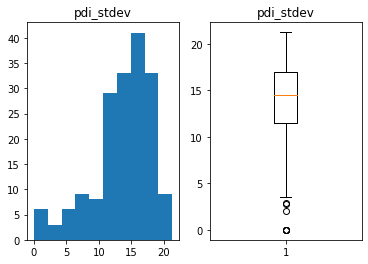

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


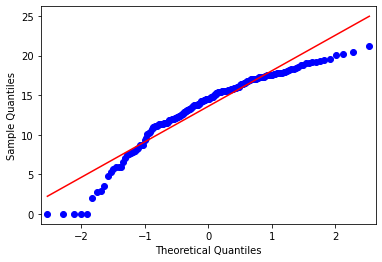

Shapiro-Wilk: Statistics = 0.914, p = 0.000
Agostino Test: Statistics = 33.879, p = 0.000
Min: 0.0, Max: 21.259171690176007


177


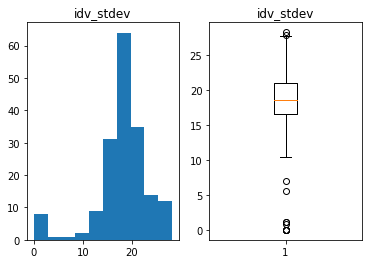

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


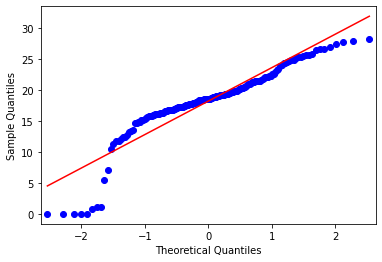

Shapiro-Wilk: Statistics = 0.867, p = 0.000
Agostino Test: Statistics = 58.289, p = 0.000
Min: 0.0, Max: 28.248631032240866


177


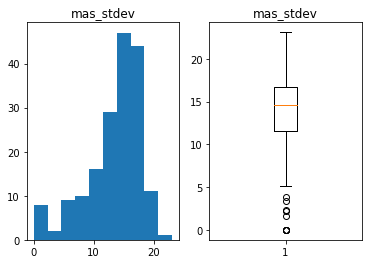

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


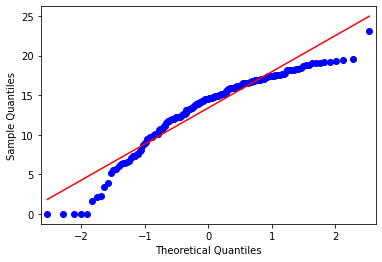

Shapiro-Wilk: Statistics = 0.913, p = 0.000
Agostino Test: Statistics = 30.744, p = 0.000
Min: 0.0, Max: 23.10098602994157


177


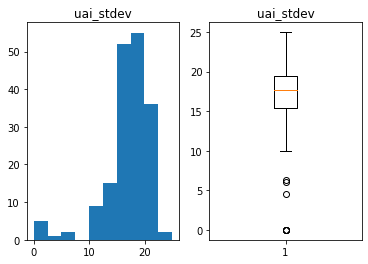

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


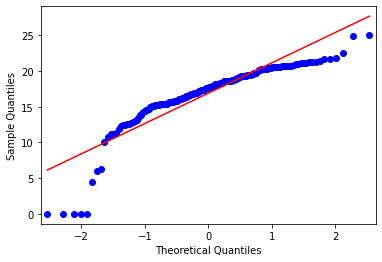

Shapiro-Wilk: Statistics = 0.823, p = 0.000
Agostino Test: Statistics = 88.202, p = 0.000
Min: 0.0, Max: 24.979634562121657


177


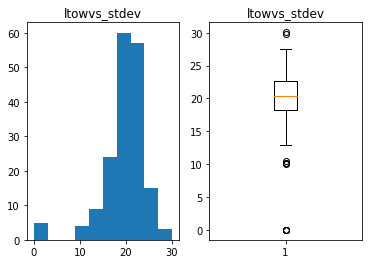

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


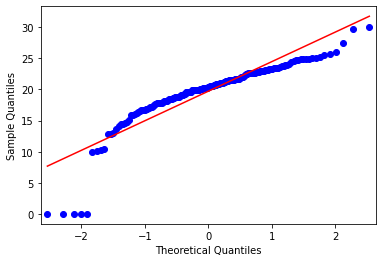

Shapiro-Wilk: Statistics = 0.828, p = 0.000
Agostino Test: Statistics = 92.108, p = 0.000
Min: 0.0, Max: 30.06342501794371


177


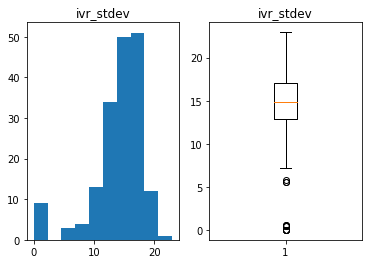

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


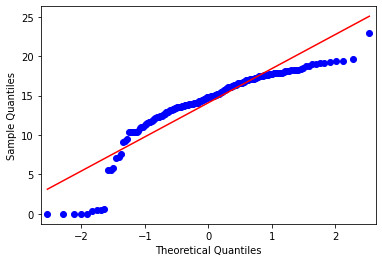

Shapiro-Wilk: Statistics = 0.842, p = 0.000
Agostino Test: Statistics = 65.210, p = 0.000
Min: 0.0, Max: 22.948181793315296


177


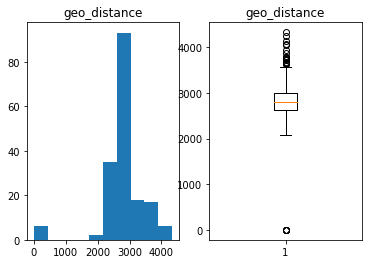

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


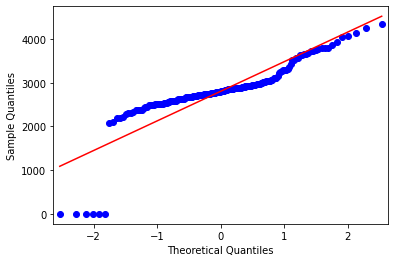

Shapiro-Wilk: Statistics = 0.764, p = 0.000
Agostino Test: Statistics = 95.353, p = 0.000
Min: 0.0, Max: 4331.831020883974




In [3]:
columns_independent = [
    "pdi_stdev", "idv_stdev", "mas_stdev", "uai_stdev", "ltowvs_stdev", "ivr_stdev", "geo_distance"
]

columns_control = [
    "totalCommitters", "turnover", "projectAge", "tenureDiversity", "tenureMedian",
    "stCongruence", "truckFactor", "centrality",
    "female", "blauGender", "teamSize", "totalcommits"
]

def check_normality(df):
    for column in df:
        column = df[column]

        # Histogram part
        print(len(column))
        fig, (ax_0, ax_1) = plt.subplots(1, 2)  # a figure with a single Axes an empty figure with no Axes
        fig.patch.set_facecolor('white')

        ax_0.hist(column)
        ax_0.set_title(column.name)

        ax_1.boxplot(column)
        ax_1.set_title(column.name)

        plt.show()

        fig, ax_2 = plt.subplots()  # a figure with a single Axes an empty figure with no Axes
        fig.patch.set_facecolor('white')

        sm.qqplot(column, line="s", ax=ax_2)
        plt.show()

        # SHapiro-Wilk Test
        stat = stats.shapiro(column)
        print("Shapiro-Wilk: Statistics = %.3f, p = %.3f" % (stat.statistic, stat.pvalue))

        # Agostino test
        stat, p = stats.normaltest(column)
        print("Agostino Test: Statistics = %.3f, p = %.3f" % (stat, p))


        print(f"Min: {min(column)}, Max: {max(column)}\n\n")

check_normality(df[columns_independent])

### Control variables

177


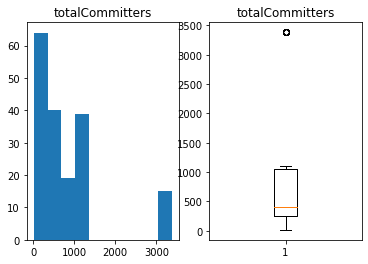

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


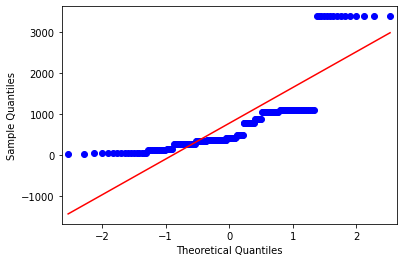

Shapiro-Wilk: Statistics = 0.672, p = 0.000
Agostino Test: Statistics = 87.009, p = 0.000
Min: 15, Max: 3384


177


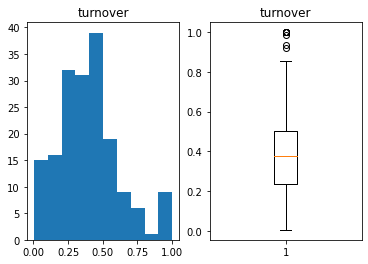

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


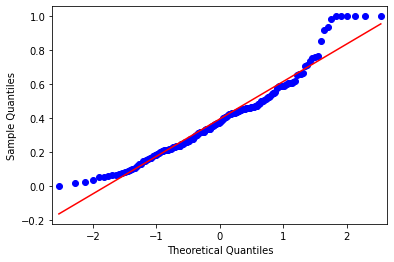

Shapiro-Wilk: Statistics = 0.951, p = 0.000
Agostino Test: Statistics = 18.353, p = 0.000
Min: 0.004, Max: 1.0


177


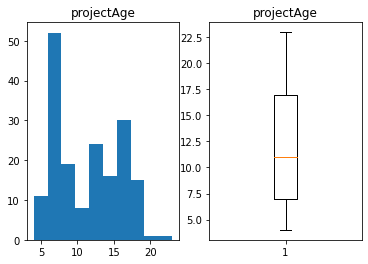

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


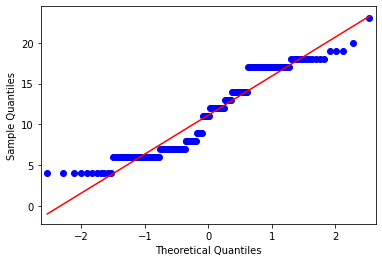

Shapiro-Wilk: Statistics = 0.911, p = 0.000
Agostino Test: Statistics = 136.074, p = 0.000
Min: 4, Max: 23


177


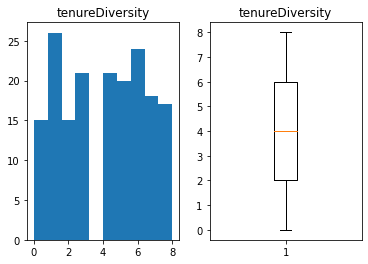

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


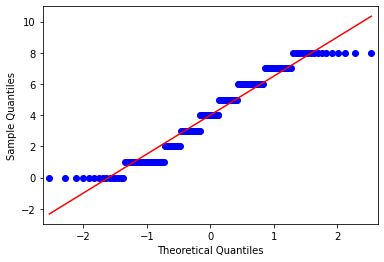

Shapiro-Wilk: Statistics = 0.935, p = 0.000
Agostino Test: Statistics = 77.301, p = 0.000
Min: 0, Max: 8


177


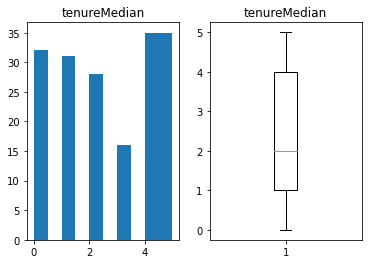

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


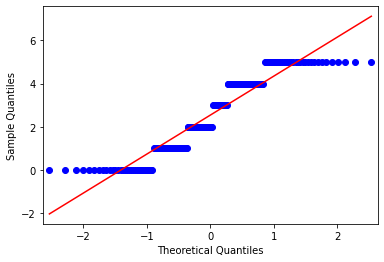

Shapiro-Wilk: Statistics = 0.882, p = 0.000
Agostino Test: Statistics = 535.047, p = 0.000
Min: 0, Max: 5


177


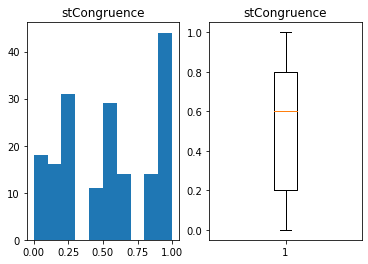

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


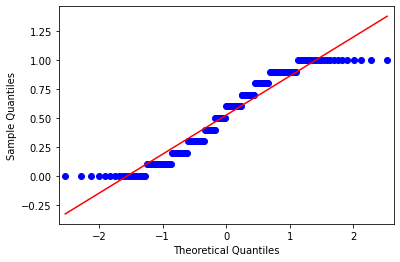

Shapiro-Wilk: Statistics = 0.917, p = 0.000
Agostino Test: Statistics = 201.366, p = 0.000
Min: 0.0, Max: 1.0


177


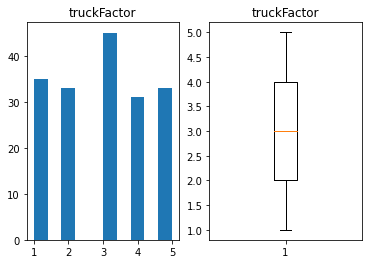

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


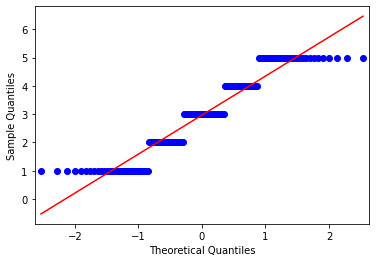

Shapiro-Wilk: Statistics = 0.894, p = 0.000
Agostino Test: Statistics = 74.269, p = 0.000
Min: 1, Max: 5


177


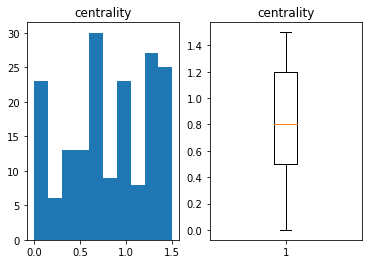

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


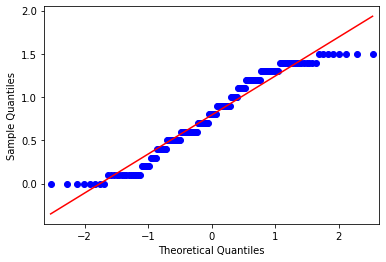

Shapiro-Wilk: Statistics = 0.945, p = 0.000
Agostino Test: Statistics = 55.422, p = 0.000
Min: 0.0, Max: 1.5


177


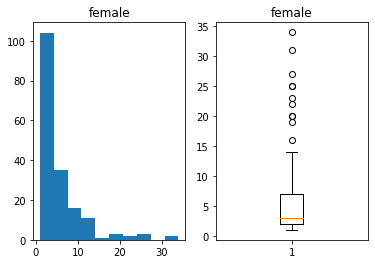

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


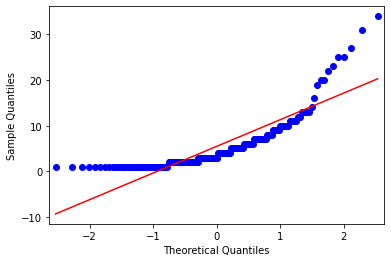

Shapiro-Wilk: Statistics = 0.722, p = 0.000
Agostino Test: Statistics = 104.968, p = 0.000
Min: 1, Max: 34


177


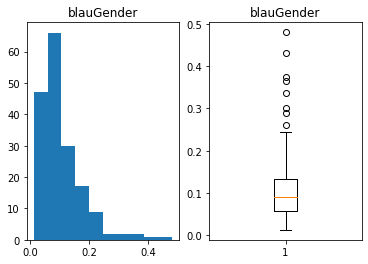

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


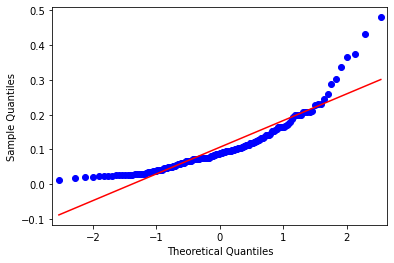

Shapiro-Wilk: Statistics = 0.835, p = 0.000
Agostino Test: Statistics = 84.747, p = 0.000
Min: 0.013, Max: 0.48


177


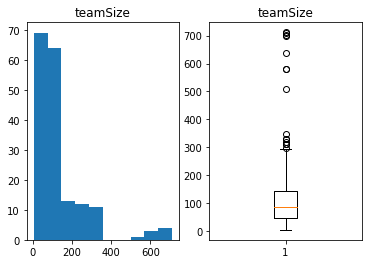

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


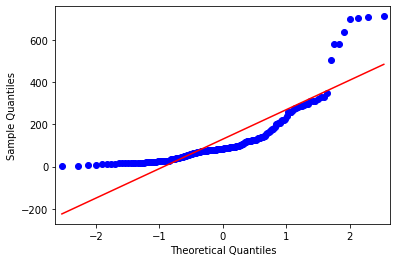

Shapiro-Wilk: Statistics = 0.722, p = 0.000
Agostino Test: Statistics = 105.358, p = 0.000
Min: 4, Max: 712


177


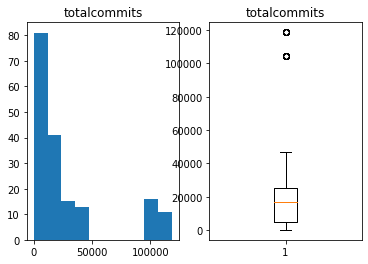

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


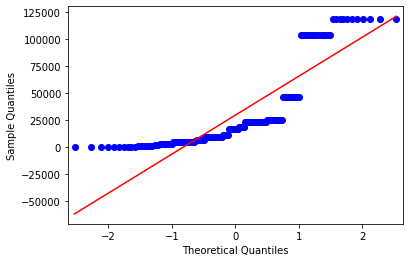

Shapiro-Wilk: Statistics = 0.706, p = 0.000
Agostino Test: Statistics = 48.831, p = 0.000
Min: 101, Max: 118673




In [4]:
check_normality(df[columns_control])

## Model construction

The following code creates the model.

In [5]:
df['totalCommitters'] = np.log2(df['totalCommitters'])
df['totalcommits'] = np.log2(df['totalcommits'])
df['teamSize'] = np.log2(df['teamSize'])

independent_vars_str = " + ".join(columns_independent)
control_vars_str = " + ".join(columns_control)

md = smf.mixedlm(f"black ~ {independent_vars_str} + {control_vars_str}",
                 data=df,
                 groups=df["window_idx"])
mdf = md.fit(reml=False)

print(mdf.summary())

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(


           Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  black    
No. Observations:   177      Method:              ML       
No. Groups:         24       Scale:               3.2045   
Min. group size:    3        Log-Likelihood:      -358.0481
Max. group size:    12       Converged:           No       
Mean group size:    7.4                                    
-----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------
Intercept        6.843    2.157  3.173 0.002   2.616 11.070
pdi_stdev        0.003    0.069  0.041 0.968  -0.132  0.138
idv_stdev       -0.034    0.061 -0.552 0.581  -0.154  0.087
mas_stdev        0.071    0.054  1.329 0.184  -0.034  0.176
uai_stdev        0.038    0.074  0.507 0.612  -0.108  0.183
ltowvs_stdev    -0.009    0.062 -0.144 0.885  -0.130  0.112
ivr_stdev        0.007    0.091  0.081 0.936  -0.17

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 1.551012
  warnings.warn(msg, ConvergenceWarning)


## Assumptions checks

The following code checks the MLL assumptions.

### Normality of residuals

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


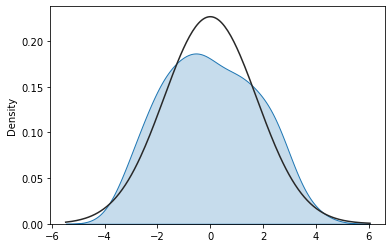

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


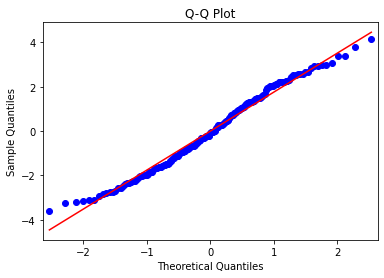

Statistic 0.9817425012588501
p-value 0.020243054255843163


In [6]:
fig, ax = plt.subplots(1, 1)  # a figure with a single Axes an empty figure with no Axes
fig.patch.set_facecolor('white')

sns.distplot(mdf.resid, hist = False, kde_kws = {"shade" : True, "lw": 1}, fit = stats.norm)

plt.show()

fig, ax = plt.subplots()  # a figure with a single Axes an empty figure with no Axes
fig.patch.set_facecolor('white')

ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")

sm.qqplot(mdf.resid, dist = stats.norm, line = 's', ax=ax)

ax.set_title("Q-Q Plot")

plt.show()

labels = ["Statistic", "p-value"]

norm_res = stats.shapiro(mdf.resid)

for key, val in dict(zip(labels, norm_res)).items():
    print(key, val)

### Homoskedasticity of variance

LM Statistic 177.0
LM-Test p-value 0.46464986927383345
F-Statistic nan
F-Test p-value nan


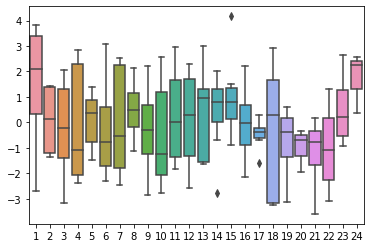

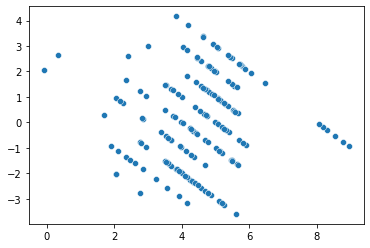

In [7]:
het_white_res = het_white(mdf.resid, mdf.model.exog)

labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]

for key, val in dict(zip(labels, het_white_res)).items():
    print(key, val)

fig, _ = plt.subplots()  # a figure with a single Axes an empty figure with no Axes
fig.patch.set_facecolor('white')

sns.boxplot(x = mdf.model.groups, y = mdf.resid)

ax.set_title("Distribution of Residuals for Weight by Litter")
ax.set_ylabel("Residuals")
ax.set_xlabel("Litter")

plt.show()

fig, _ = plt.subplots()  # a figure with a single Axes an empty figure with no Axes
fig.patch.set_facecolor('white')

sns.scatterplot(y = mdf.resid, x = mdf.fittedvalues)

ax.set_title("RVF Plot")
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals")

plt.show()
